### Importing Required Libraries

In this section, we import the Python libraries that will be used throughout the analysis:

- **pandas**: for data manipulation and analysis
- **numpy**: for numerical operations
- **matplotlib.pyplot** and **seaborn**: for data visualization
- %matplotlib inline: enables plots to appear directly in the notebook


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### Loading Ratings Data

We start by loading the main dataset file u.data, which contains user ratings for movies.  
The columns are manually defined based on the dataset documentation:

- user_id: ID of the user who rated the movie
- item_id: ID of the movie that was rated
- rating: User's rating (from 1 to 5)
- timestamp: Time when the rating was made

We use pandas.read_csv() with a tab separator (\t) and assign our column names. Below is a preview of the first five records.


In [2]:
# Defining column names based on the dataset structure
column_names = ['user_id', 'item_id', 'rating', 'timestamp']

# Loading u.data into a DataFrame
ratings_df = pd.read_csv('../data/u.data', sep='\t', names=column_names)

# Displaying the first 5 rows
ratings_df.head()


,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


### Loading Movie Metadata

This section loads movie details from the u.item file, which contains metadata about each movie.

We define the column names based on the MovieLens README file, which includes:

- item_id: Movie ID (matches item_id in ratings)
- title: Movie title
- release_date, video_release_date, IMDb_URL: Release and reference info
- The rest are binary flags (0/1) indicating the movie's genre(s)

We use encoding='latin-1' to correctly load special characters in some movie titles.


In [3]:
# Defining column names for the u.item file (based on MovieLens README)
movie_columns = ['item_id', 'title', 'release_date', 'video_release_date', 'IMDb_URL',
                 'unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
                 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
                 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Loading u.item into a DataFrame 
movies_df = pd.read_csv('../data/u.item', sep='|', names=movie_columns, encoding='latin-1')

# Displaying the first few rows
movies_df[['item_id', 'title']].head()


,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [4]:
# Merging ratings with movie titles using item_id as the key
ratings_with_titles = pd.merge(ratings_df, movies_df[['item_id', 'title']], on='item_id')

# Displaying the merged data
ratings_with_titles.head()


,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)
3,244,51,2,880606923,Legends of the Fall (1994)
4,166,346,1,886397596,Jackie Brown (1997)


In [5]:
# Counting how many ratings each movie received
rating_counts = ratings_with_titles.groupby('title').size().reset_index(name='num_ratings')

# Calculating average rating per movie
average_ratings = ratings_with_titles.groupby('title')['rating'].mean().reset_index(name='avg_rating')

# Merging counts with averages
movie_stats = pd.merge(average_ratings, rating_counts, on='title')

# Filtering to movies with at least 50 ratings
popular_movies = movie_stats[movie_stats['num_ratings'] >= 50]

# Sorting by average rating in descending order
top_5_movies = popular_movies.sort_values(by='avg_rating', ascending=False).head(5)

# Displaying results
top_5_movies



,title,avg_rating,num_ratings
318,"Close Shave, A (1995)",4.491071,112
1281,Schindler's List (1993),4.466443,298
1652,"Wrong Trousers, The (1993)",4.466102,118
273,Casablanca (1942),4.456790,243
1597,Wallace & Gromit: The Best of Aardman Animatio...,4.447761,67


The table above shows the top 5 movies with the highest average ratings from users who rated at least 50 movies. These titles are popular and well-loved by MovieLens users, reflecting strong positive reception.


### Top 5 Movies by Average Rating (with at least 50 ratings)

In this section, we analyze the movie ratings dataset to find the top 5 movies with the highest average ratings. 

To ensure the results are meaningful, we only consider movies that have received at least 50 ratings. This filter helps avoid cases where a movie might have a high rating based on very few reviews.

The steps include:
- Counting how many ratings each movie received.
- Calculating the average rating per movie.
- Filtering to include only popular movies with 50+ ratings.
- Sorting the movies by average rating in descending order.

This helps us identify the most loved movies according to the MovieLens users.


In [6]:
# Loading genre data
genre_df = pd.read_csv("../data/u.genre", sep="|", header=None, names=["genre", "genre_id"])
genre_df.head()


,genre,genre_id
0,unknown,0
1,Action,1
2,Adventure,2
3,Animation,3
4,Children's,4


In [7]:
# Defining column names for the u.item file
movie_cols = [
    "movie_id", "title", "release_date", "video_release_date", "IMDb_URL",
    "unknown", "Action", "Adventure", "Animation", "Children's", "Comedy", "Crime",
    "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery",
    "Romance", "Sci-Fi", "Thriller", "War", "Western"
]

# Loading the movies dataset
movies = pd.read_csv("../data/u.item", sep="|", encoding="latin-1", header=None, names=movie_cols)

# Preview
movies.head()


,movie_id,title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
# Loading movie details with genres (if not done yet)
movie_cols = [
    "movie_id", "title", "release_date", "video_release_date", "IMDb_URL",
    "unknown", "Action", "Adventure", "Animation", "Children's", "Comedy", "Crime",
    "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery",
    "Romance", "Sci-Fi", "Thriller", "War", "Western"
]

movies = pd.read_csv("../data/u.item", sep="|", encoding="latin-1", header=None, names=movie_cols)

# Loading ratings data
ratings = pd.read_csv("../data/u.data", sep="\t", header=None, names=["user_id", "movie_id", "rating", "timestamp"])

# Merging to get ratings and movie details including genres
ratings_with_movies = pd.merge(ratings, movies, on="movie_id")






### Most Liked Genres by Average Rating

This section explores which movie genres were rated the highest on average.

Each movie can belong to multiple genres. We calculate the average user rating for each genre by:
- Looping through each genre column
- Selecting only the movies that belong to that genre
- Calculating the mean rating across those movies

This helps identify which genres were most liked by users overall.


In [9]:
# Creating an empty list to hold results
genre_avg_ratings = []

# Calculating the average rating of movies in that genre for each genre column
genre_columns = movie_cols[5:]  # genres starting from index 5

for genre in genre_columns:
    # Filtering rows where the movie has this genre
    genre_movies = ratings_with_movies[ratings_with_movies[genre] == 1]
    
    # Calculating average rating
    avg_rating = genre_movies["rating"].mean()
    
    # Appending to list
    genre_avg_ratings.append((genre, avg_rating))

# Converting to DataFrame and sort by rating in descending order
genre_ratings_df = pd.DataFrame(genre_avg_ratings, columns=["Genre", "Average Rating"]).sort_values(by="Average Rating", ascending=False)

# Displaying the result
genre_ratings_df


,Genre,Average Rating
10,Film-Noir,3.921523
17,War,3.815812
8,Drama,3.687379
7,Documentary,3.672823
13,Mystery,3.638132
6,Crime,3.632278
14,Romance,3.621705
18,Western,3.613269
3,Animation,3.576699
15,Sci-Fi,3.560723


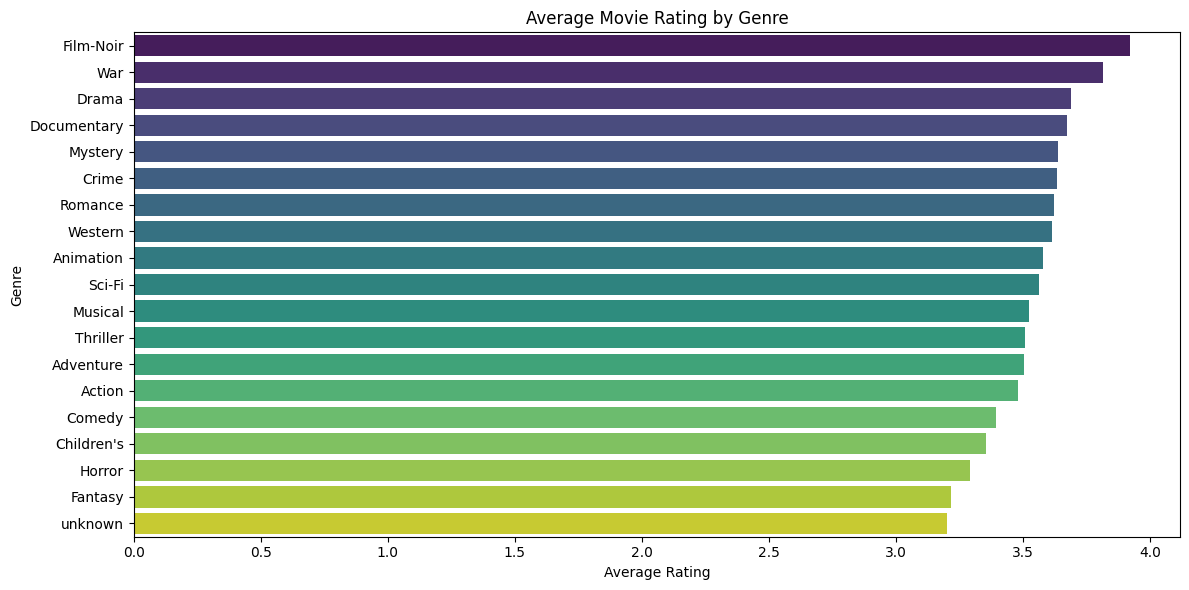

In [19]:
import os
os.makedirs("images", exist_ok=True)  # This ensures the folder exists

plt.figure(figsize=(12,6))
sns.barplot(data=genre_ratings_df, x="Average Rating", y="Genre", palette="viridis", hue="Genre", legend=False)

plt.title("Average Movie Rating by Genre")
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.tight_layout()

# Save the plot
plt.savefig("../images/average_rating_by_genre.png", dpi=300)

plt.show()



This bar chart shows the average user rating for each movie genre.  
It provides a quick visual comparison of how well each genre was received by users in the dataset.

We can clearly see that Film-Noir, War, and Drama were the most highly rated genres.


### Average Movie Rating by Gender

This analysis calculates the average rating given by users grouped by their gender.

It helps understand if there are differences in rating behavior between male and female users.


In [11]:
# Loading user data 
users = pd.read_csv("../data/u.user", sep="|", header=None, names=["user_id", "age", "gender", "occupation", "zip_code"])

# Merging ratings with user info
ratings_with_users = pd.merge(ratings, users, on="user_id")

# Calculating average rating by gender
avg_rating_by_gender = ratings_with_users.groupby("gender")["rating"].mean()

avg_rating_by_gender


gender
F    3.531507
M    3.529289
Name: rating, dtype: float64

### Number of Users in Each Age Group

In this step, we categorize users into different age groups to understand the distribution of the user base by age.

Grouping by age brackets helps identify which age groups are more represented among users.


In [12]:
# Defining age bins and labels
age_bins = [0, 18, 30, 45, 60, 100]
age_labels = ["0-18", "19-30", "31-45", "46-60", "60+"]

# Adding an age group column to users DataFrame
users['age_group'] = pd.cut(users['age'], bins=age_bins, labels=age_labels, right=False)

# Counting number of users per age group
age_group_counts = users['age_group'].value_counts().sort_index()

age_group_counts


age_group
0-18      36
19-30    373
31-45    329
46-60    174
60+       31
Name: count, dtype: int64

### Average Movie Rating by Occupation

This analysis explores whether users' occupations influence their movie ratings.

By grouping users by occupation and calculating the average rating given, we can observe if certain professions tend to rate movies higher or lower on average.


In [13]:
# Merging ratings with user data to get occupations
ratings_with_users = pd.merge(ratings, users, on='user_id')

# Calculating average rating by occupation in descending order
avg_rating_by_occupation = ratings_with_users.groupby('occupation')['rating'].mean().sort_values(ascending=False)

avg_rating_by_occupation


occupation
none             3.779134
lawyer           3.735316
doctor           3.688889
educator         3.670621
artist           3.653380
administrator    3.635646
scientist        3.611273
salesman         3.582944
programmer       3.568260
librarian        3.560781
other            3.552377
engineer         3.541407
technician       3.532230
student          3.515143
marketing        3.485641
retired          3.466750
entertainment    3.441050
writer           3.375723
executive        3.349104
homemaker        3.301003
healthcare       2.896220
Name: rating, dtype: float64

### Most Rated Movies (Popularity)

This analysis identifies the movies that have received the highest number of ratings.

Counting the number of ratings per movie helps highlight which movies are the most popular or frequently watched.


In [14]:
# Counting the number of ratings per movie
movie_rating_counts = ratings['movie_id'].value_counts()

# Merging with movies DataFrame to get movie titles
most_rated_movies = pd.DataFrame({
    'movie_id': movie_rating_counts.index,
    'num_ratings': movie_rating_counts.values
})

most_rated_movies = most_rated_movies.merge(movies[['movie_id', 'title']], on='movie_id')

# Displaying top 10 most rated movies
most_rated_movies.head(10)


,movie_id,num_ratings,title
0,50,583,Star Wars (1977)
1,258,509,Contact (1997)
2,100,508,Fargo (1996)
3,181,507,Return of the Jedi (1983)
4,294,485,Liar Liar (1997)
5,286,481,"English Patient, The (1996)"
6,288,478,Scream (1996)
7,1,452,Toy Story (1995)
8,300,431,Air Force One (1997)
9,121,429,Independence Day (ID4) (1996)
